In [1]:
using Plots
#import Pkg; Pkg.add("SpecialFunctions")
using SpecialFunctions
using BenchmarkTools

In [2]:
sphere(x) = x'*x

sphere (generic function with 1 method)

In [15]:
function volumen(surface, R, Box, N::Int; dim=2)
    c = 0
    @inbounds for i in 1:N
        x = rand(dim) #llenamos solo una sección de la  caja x[i] > 0
        c += (surface(x) < R/Box)*1
    end
    # the volumen is: \pi^{n/2}/\Gamma(n/2+1)
    return c/N*(2/Box)^dim / π^(dim/2) * gamma(dim/2+1)
end


volumen (generic function with 2 methods)

In [16]:
function volumen_plot(surface, R, Box, N::Int; dim=2)
    X = zeros(dim,N)
    c = 0
    @inbounds for i in 1:N
        x = rand(dim) #llenamos solo una sección de la  caja x[i] > 0
        c += (surface(x) < R/Box)*1
        X[:,i] = x
    end
    # the volumen is: \pi^{n/2}/\Gamma(n/2+1)
    return (c/N*(2/Box)^dim / π^(dim/2) * gamma(dim/2+1), X)
end


volumen_plot (generic function with 2 methods)

In [17]:
N = 100_000
@btime volumen(sphere, 1, 1, N , 4)

  5.689 ms (100000 allocations: 9.16 MiB)


0.9906455824025563

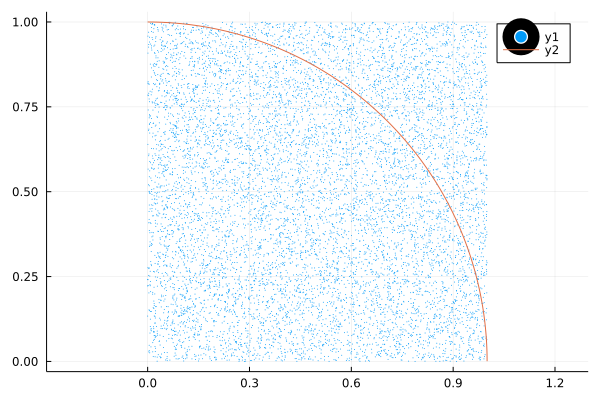

In [18]:
#N = 100_000_000
N = 10_000
val, X = volumen_plot(sphere, 1, 1, N , 2)
scatter(X[1,:],X[2,:], markersize = 0.2, aspectratio=1)
t = 0:0.01:π/2
plot!(sin.(t),cos.(t))

In [19]:
dim = 5
for n in 1:9
    N = 10^n
    Val = volumen(sphere, 1, 1, N, dim=dim)
    println("n = $n, $(Val)")
end
    

n = 1, 1.2158542037080533
n = 2, 0.729512522224832
n = 3, 0.9118906527810399
n = 4, 1.0213175311147649
n = 5, 1.0005872169415424
n = 6, 0.9947875923898551
n = 7, 0.9998966117538363
n = 8, 1.0001353447267345
n = 9, 1.0001384877098511
